In [256]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=DeprecationWarning)

import pandas as pd 
pd.options.display.max_columns = 100

import numpy as np 


from PIL import Image
from scipy import ndimage

import seaborn as sns

import pylab as plot
params = { 
    'axes.labelsize': "large",
    'xtick.labelsize': 'x-large',
    'legend.fontsize': 20,
    'figure.dpi': 150,
    'figure.figsize': [25, 7]
}
plot.rcParams.update(params)


sns.set_style("darkgrid", {"axes.facecolor": ".95"})
%config InlineBackend.figure_format = 'svg'

import cv2
import glob
import keras
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.optimizers import SGD, Adam, RMSprop, Adagrad, Nadam, Adadelta, Adamax
from keras.utils import to_categorical
from matplotlib import pyplot

from keras.layers import Dense, Activation
from keras.regularizers import l1
# instantiate regularizer
reg = l1(0.001)
from sklearn.model_selection import train_test_split

In [257]:
the_endoscope_images1, the_endoscope_labels1 = np.load("endoscope_images1.npy") , np.load("endoscope_labels1.npy")

print(the_endoscope_images1, the_endoscope_labels1)



X_train, X_test, Y_train, Y_test = train_test_split(the_endoscope_images1, the_endoscope_labels1, test_size=0.2)
    
    #converting to float and normalizing
X_train = X_train.astype('float32')/255 
X_test = X_test.astype('float32')/255
    
    #getting the numbr of unique classes in the labels
#num_classes=len(np.unique(the_endoscope_labels1))

num_classes = 8
    
    
#     #One hot encoding as classifier since we  has multiple classes
Y_train=keras.utils.to_categorical(Y_train,num_classes)
Y_test=keras.utils.to_categorical(Y_test,num_classes )


[[[[ 4  4  4]
   [ 4  4  4]
   [ 2  4  4]
   ...
   [ 3  3  3]
   [ 4  4  4]
   [ 4  4  4]]

  [[ 2  4  4]
   [ 0  3  1]
   [ 4  3  2]
   ...
   [ 0  2  2]
   [ 1  3  3]
   [ 1  3  3]]

  [[ 2  2  2]
   [ 2  2  2]
   [ 2  2  2]
   ...
   [ 2  2  2]
   [ 2  2  2]
   [ 0  2  2]]

  ...

  [[ 0  0  0]
   [ 0  0  0]
   [57 64 33]
   ...
   [ 0  0  0]
   [ 0  0  0]
   [ 0  0  0]]

  [[ 0  0  0]
   [ 0  0  0]
   [ 0  0  0]
   ...
   [ 0  0  0]
   [ 0  0  0]
   [ 0  0  0]]

  [[ 1  1  1]
   [ 1  1  1]
   [ 1  1  1]
   ...
   [ 1  1  1]
   [ 1  1  1]
   [ 0  2  0]]]


 [[[ 4  4  4]
   [ 5  5  5]
   [ 4  4  4]
   ...
   [ 4  4  4]
   [ 4  4  4]
   [ 3  3  3]]

  [[ 3  4  2]
   [ 1  3  3]
   [ 3  4  3]
   ...
   [ 2  3  3]
   [ 0  1  1]
   [ 0  2  2]]

  [[ 3  2  2]
   [ 2  2  2]
   [ 2  2  2]
   ...
   [ 2  2  2]
   [ 2  2  2]
   [ 1  1  1]]

  ...

  [[ 1  1  1]
   [ 1  1  1]
   [62 69 36]
   ...
   [ 0  0  0]
   [ 1  1  1]
   [ 0  0  0]]

  [[ 1  1  1]
   [ 1  1  1]
   [ 1  1  1]
   ...
   [ 

In [258]:


# load weights into new model
cnnmodel_rmsprop = Sequential()
cnnmodel_rmsprop.add(Conv2D(filters=16,kernel_size=2,padding="same",activation="relu",input_shape=(50,50,3)))
cnnmodel_rmsprop.add(MaxPooling2D(pool_size=2))
cnnmodel_rmsprop.add(Conv2D(filters=32,kernel_size=2,padding="same",activation="relu"))
cnnmodel_rmsprop.add(MaxPooling2D(pool_size=2))
cnnmodel_rmsprop.add(Flatten())
cnnmodel_rmsprop.add(Dense(50,activation="relu"))
cnnmodel_rmsprop.add(Dense(8,activation="softmax"))#2 represent output layer neurons 
#cnnmodel_rmsprop.summary()
cnnmodel_rmsprop.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

#load from dist
cnnmodel_rmsprop.load_weights("cnnmodel_rmsprop.h5")
print("Loaded model from disk")



Loaded model from disk


In [259]:

loaded_nnmodel = Sequential()
loaded_nnmodel.add(Dense(32, input_shape=(50,50,3)))
loaded_nnmodel.add(Activation('relu'))
loaded_nnmodel.add(Flatten())
loaded_nnmodel.add(Dense(8,activation="softmax")) 

#load from dist
loaded_nnmodel.load_weights("nnmodel.h5")
print("Loaded model from disk")



Loaded model from disk


In [260]:
data_path = "C:\\Users\\kratika\\KratikaML\\QX_DataScience_Kratika\\20-projects_List\\endoscopy\\test-data";

In [261]:
classes = ["dyed-lifted-polyps",
           "dyed-resection-margins",
           "esophagitis",
           "normal-cecum",
           "normal-pylorus",
           "normal-z-line",
           "polyps",
           "ulcerative-colitis"]
def printPredictedValues(images_name,pred):
    for i in range(len(images_name)):
        predicted_class = ""
        for j in range(len(pred[i])):
            if(pred[i][j] > 0.5) :
                predicted_class += " "+classes[j]
        
        print(images_name[i] + " belongs to :" + predicted_class);
        
   

In [262]:
     
images_for_test = []
images_names = []

for i in glob.glob(os.path.join(data_path,'*')):
    img = cv2.imread(i)
    #img  = cv2.cvtColor(img , cv2.COLOR_BGR2GRAY) # convert to grayscale
    img = cv2.resize(img,(50,50))  #resize
    images_for_test.append(np.array(img))
    
    images_names.append(i.replace(os.path.join(data_path,''), ""))
images_for_test = np.array(images_for_test)

In [263]:
# Testing

from keras.preprocessing.image import ImageDataGenerator

data_path = "C:\\Users\\kratika\\KratikaML\\QX_DataScience_Kratika\\20-projects_List\\endoscopy\\TEST-DATA-3-INTERNET";
test_data_generator = ImageDataGenerator(rescale=1./255)

test_generator = test_data_generator.flow_from_directory(
    data_path, 
    target_size=(50, 50),
    batch_size=1,
    shuffle=False)

test_generator.__len__()

Found 1000 images belonging to 8 classes.


1000

99.22% esophagitis file:5_normal-z-line\00bee375-36d2-4ba9-89e5-bd6132d79c0c.jpg
99.07% esophagitis file:5_normal-z-line\00db2b25-bb71-4218-a076-9d2449a23f2e.jpg
99.88% esophagitis file:5_normal-z-line\016858b4-36f8-47d7-97ca-1570bcaba413.jpg
74.33% esophagitis file:5_normal-z-line\01a146ce-c9a3-42af-9f53-573e90975abe.jpg
99.78% esophagitis file:5_normal-z-line\01c1453c-dcad-4e16-a0d5-645e833ce82c.jpg
89.55% esophagitis file:5_normal-z-line\01cf965e-28f2-4fc2-9d42-dace76989ca2.jpg
99.85% esophagitis file:5_normal-z-line\026f0d8f-2272-4e50-b73e-742b580619d7.jpg
99.88% esophagitis file:5_normal-z-line\02896af8-ebb2-4ed0-94dd-6a76fbf7f00b.jpg
99.81% esophagitis file:5_normal-z-line\032d6b45-f706-444d-b4d9-c11a4df4d364.jpg
58.44% normal-z-line file:5_normal-z-line\03be9506-bf4a-42e5-b18b-ec8388860fae.jpg
99.91% esophagitis file:5_normal-z-line\04524939-275b-44ad-b4dc-95f3d15164ac.jpg
99.89% esophagitis file:5_normal-z-line\04f8da65-fbd9-4fb8-aadb-db942eceb836.jpg
100.00% esophagitis file:5

99.89% esophagitis file:5_normal-z-line\7ed85379-a041-4dfa-b8fb-86f040ee41d7.jpg
99.88% esophagitis file:5_normal-z-line\7f21dc56-8c3d-4097-b457-fe86a3460175.jpg
98.81% esophagitis file:5_normal-z-line\7f65d0d5-d5ef-4733-8df2-c9ea3599f972.jpg
99.57% esophagitis file:5_normal-z-line\7f82012e-69ff-45ed-9a52-95e87cc4558b.jpg
95.44% esophagitis file:5_normal-z-line\7f8e645e-f092-453a-bc05-9891361404cb.jpg
98.12% esophagitis file:5_normal-z-line\8005375b-6481-4c6d-ba36-fd08023f37d5.jpg
87.36% esophagitis file:5_normal-z-line\80196399-6be5-4e64-82ef-5c634fda9c3f.jpg
90.38% dyed-resection-margins file:5_normal-z-line\8082db24-c40b-459b-a462-644fbcc1131c.jpg
99.97% esophagitis file:5_normal-z-line\815ef392-0282-497a-990b-ea9c5e12c8f4.jpg
99.60% esophagitis file:5_normal-z-line\81744c39-a511-47c0-9114-ba1e17e9be97.jpg
100.00% esophagitis file:5_normal-z-line\8227366d-71db-4aca-8202-e704e3a8afee.jpg
98.29% esophagitis file:5_normal-z-line\8276ff53-d9ba-4e70-8315-0290f7ff6a22.jpg
100.00% esophagi

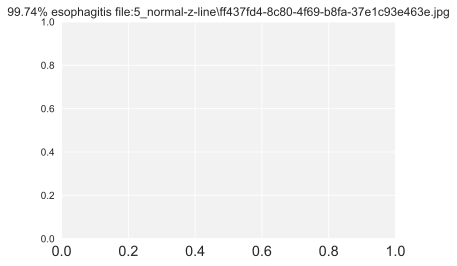

In [264]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
probabilities = loaded_nnmodel.predict_generator(test_generator,steps=1000)

for index, probability in enumerate(probabilities):
    image_path = data_path + "\\" +test_generator.filenames[index]
   
    for i, val in enumerate( probability):
        if(val > 0.5):
            print("%.2f" % (probability[i]*100) + "% " + classes[i] + " file:"+test_generator.filenames[index])
            plt.title("%.2f" % (probability[i]*100) + "% " + classes[i] + " file:"+test_generator.filenames[index])
        
    
    

In [242]:
 #img = mpimg.imread(image_path)
    #plt.imshow(img)
    

In [265]:
# Testing

from keras.preprocessing.image import ImageDataGenerator

data_path = "C:\\Users\\kratika\\KratikaML\\QX_DataScience_Kratika\\20-projects_List\\endoscopy\\TEST-DATA-3-INTERNET";
test_data_generator = ImageDataGenerator(rescale=1./255)

test_generator = test_data_generator.flow_from_directory(
    data_path, 
    target_size=(50, 50),
    batch_size=1,
    shuffle=False)

test_generator.__len__()

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


Found 1000 images belonging to 8 classes.


In [266]:
probabilities = cnnmodel_rmsprop.predict_proba(images_for_test)
predicted_values_model = cnnmodel_rmsprop.predict(images_for_test)
predicted_values_num_class = np.argmax(predicted_values_model, axis=1)

    

In [267]:

for index, probability in enumerate(probabilities):
    indexOfClass = predicted_values_num_class[index]
    print("%.2f" % (probability[indexOfClass]*100) + "% " + classes[indexOfClass] + " file:"+images_names[index])

100.00% normal-z-line file:00bee375-36d2-4ba9-89e5-bd6132d79c0c.jpg
100.00% esophagitis file:00db2b25-bb71-4218-a076-9d2449a23f2e.jpg
100.00% normal-z-line file:016858b4-36f8-47d7-97ca-1570bcaba413.jpg
100.00% esophagitis file:01a146ce-c9a3-42af-9f53-573e90975abe.jpg
100.00% esophagitis file:01c1453c-dcad-4e16-a0d5-645e833ce82c.jpg
100.00% normal-z-line file:01cf965e-28f2-4fc2-9d42-dace76989ca2.jpg
100.00% normal-z-line file:026f0d8f-2272-4e50-b73e-742b580619d7.jpg
100.00% esophagitis file:02896af8-ebb2-4ed0-94dd-6a76fbf7f00b.jpg
100.00% normal-z-line file:032d6b45-f706-444d-b4d9-c11a4df4d364.jpg
100.00% normal-z-line file:03be9506-bf4a-42e5-b18b-ec8388860fae.jpg
100.00% normal-z-line file:04524939-275b-44ad-b4dc-95f3d15164ac.jpg
100.00% normal-z-line file:04f8da65-fbd9-4fb8-aadb-db942eceb836.jpg
100.00% esophagitis file:06541193-930d-4f85-aaaa-dca05bd2a31a.jpg
100.00% normal-z-line file:06b44ebc-e89c-4263-9556-6eaae3952230.jpg
100.00% normal-pylorus file:06d96dfe-38bd-4d8c-b081-c67e65

In [205]:
def printPredictedValues2(images_name,pred):
    for i in range(len(images_name)):
        
        predicted_class = classes[pred[i]]
        
        print(images_name[i] + " belongs to :" + predicted_class);
        
   

In [206]:

predicted_values_model = cnnmodel_rmsprop.predict(images_for_test)

predicted_values_model = np.argmax(predicted_values_model, axis=1)
print("cnnmodel_rmsprop Model Predicted Values : ")
printPredictedValues2(images_names, predicted_values_model)

cnnmodel_rmsprop Model Predicted Values : 
000eeefc-9035-4d42-92a1-2f97a3200ee0.jpg belongs to :ulcerative-colitis
0046dd24-a4c0-4923-a07a-15be898182e2.jpg belongs to :ulcerative-colitis
005b9962-41ed-4ae4-8aae-395bbab93fd7.jpg belongs to :ulcerative-colitis
007dcc7c-1f16-49ee-a8a1-5e752596abd5.jpg belongs to :ulcerative-colitis
00a436bc-67ee-4a43-b1a7-25130a2d4e72.jpg belongs to :ulcerative-colitis
00e241d0-6679-4da7-bd9e-d1cfb56a33e5.jpg belongs to :ulcerative-colitis
013f51fa-caf3-4c31-adc5-af00eacf55c7.jpg belongs to :ulcerative-colitis
018962bd-e536-404b-854e-6836abd8b5c8.jpg belongs to :ulcerative-colitis
01bf0602-b49e-4a1c-a54c-ac132a52233d.jpg belongs to :ulcerative-colitis
01c87d4d-4ae7-461c-91af-936972ce37ea.jpg belongs to :ulcerative-colitis
02039406-18b3-4f10-95ab-f2f7280ef351.jpg belongs to :ulcerative-colitis
020e25c2-b4ff-40a4-a991-844b273493fb.jpg belongs to :polyps
0229c3b4-2414-4bcf-a729-ce15007f63b5.jpg belongs to :ulcerative-colitis
022d5583-4d26-430b-96b7-cea372edb